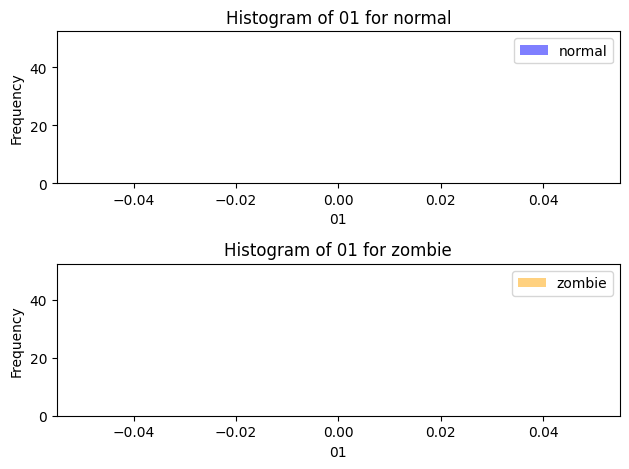

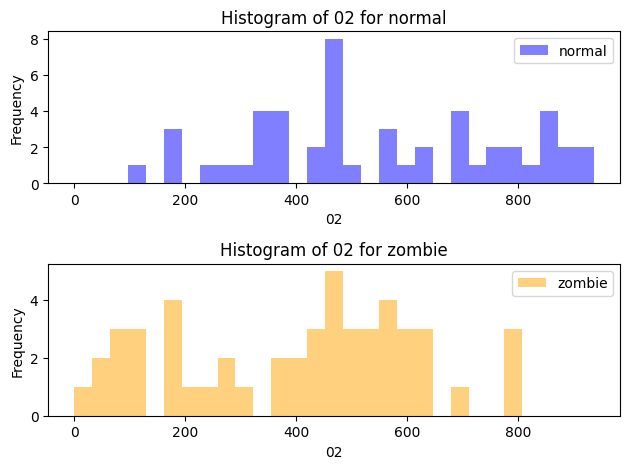

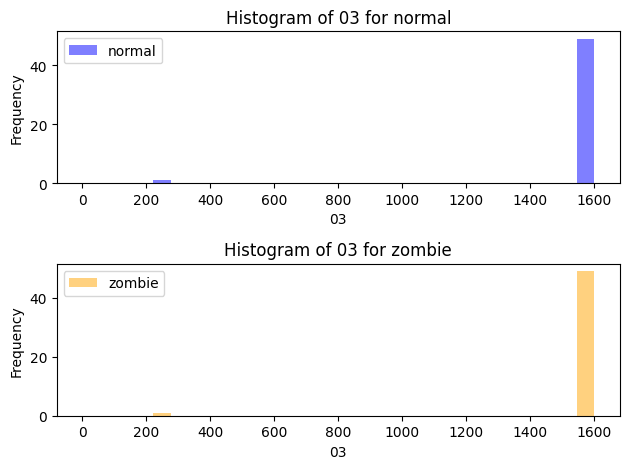

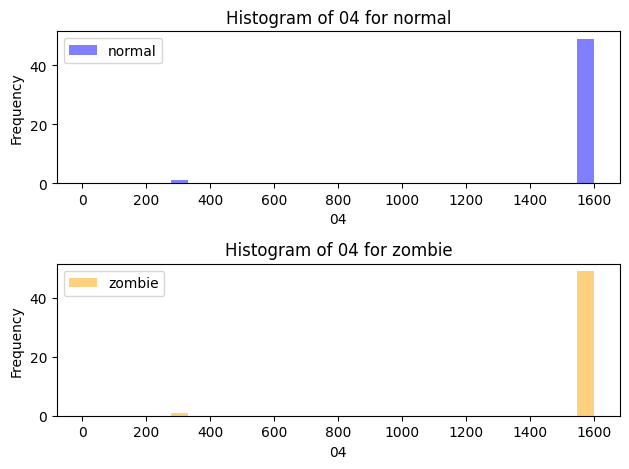

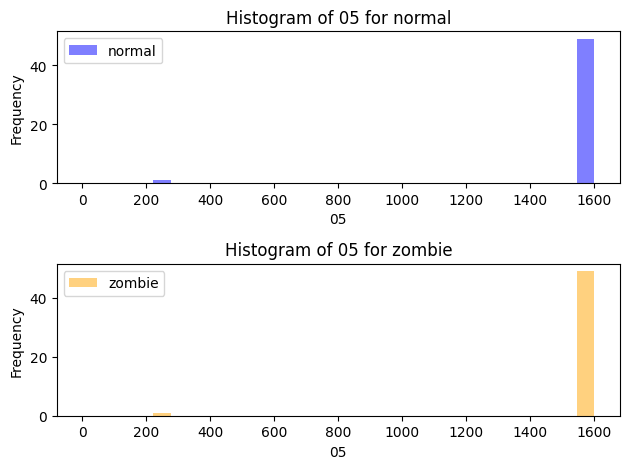

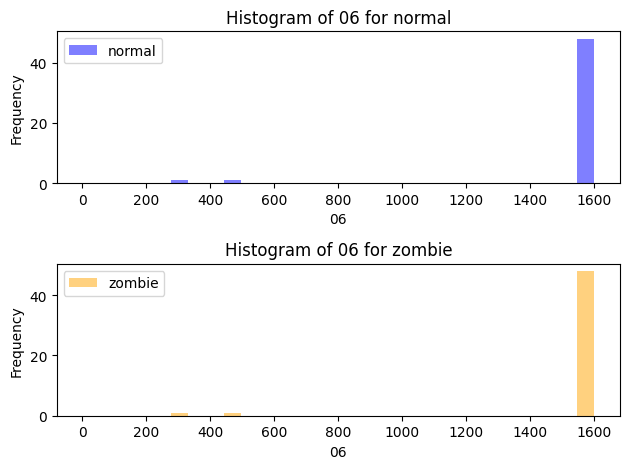

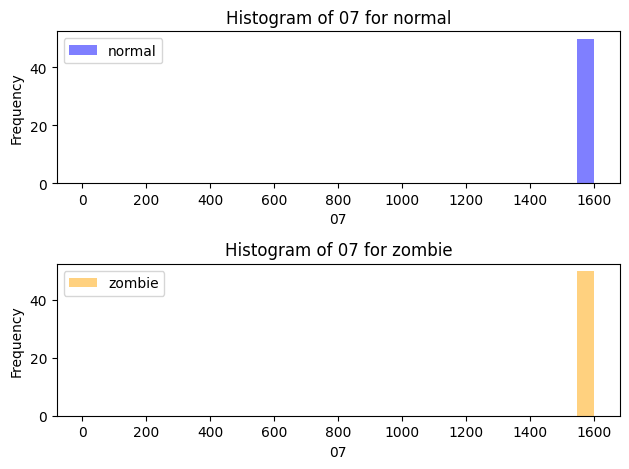

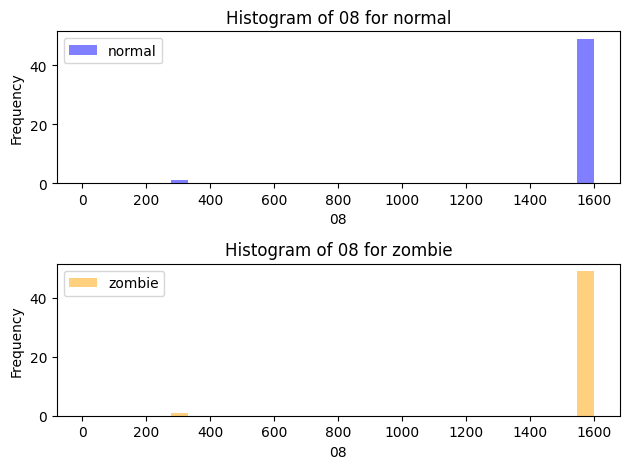

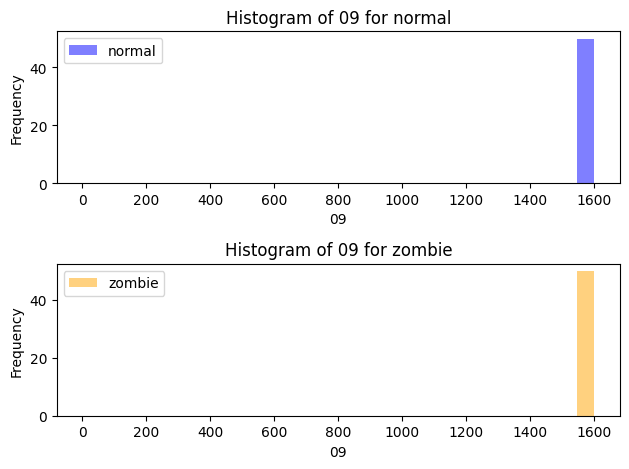

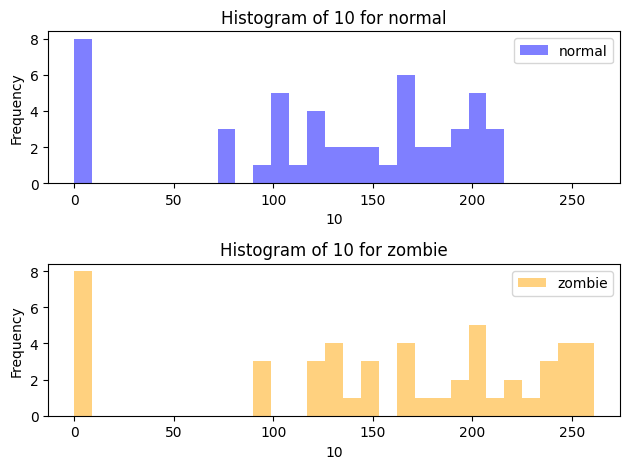

              precision    recall  f1-score   support

      normal       0.68      0.76      0.72        17
      zombie       0.64      0.54      0.58        13

    accuracy                           0.67        30
   macro avg       0.66      0.65      0.65        30
weighted avg       0.66      0.67      0.66        30

Accuracy: 66.67%

Confusion Matrix:
[[13  4]
 [ 6  7]]


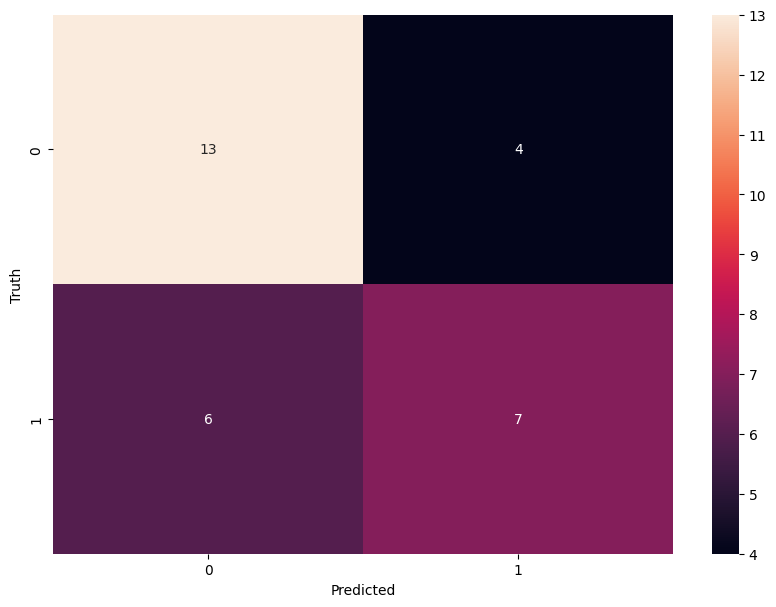

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the new CSV data
df = pd.read_csv("tugas.csv")

# Deleting the 'Number' column
df = df.drop(columns=["Number"])

# List of columns for which we want to plot histograms
columns = df.columns.drop(['label'])

# For each column
for col in columns:
    # Create a new figure with 2 subplots: one for 'normal', one for 'zombie'
    fig, axs = plt.subplots(2)

    # Create a histogram for normal label
    df_normal = df[df['label'] == 'normal'][col]
    df_zombie = df[df['label'] == 'zombie'][col]

    # Calculate the max value among both dataframes for bin range
    max_value = max(df_normal.max(), df_zombie.max())

    # Create bins
    bins = np.linspace(0, max_value, 30)

    # Plot histogram for normal and zombie labels
    axs[0].hist(df_normal, bins=bins, alpha=0.5, color='blue', label='normal')
    axs[1].hist(df_zombie, bins=bins, alpha=0.5, color='orange', label='zombie')

    # Set title and labels for each subplot
    axs[0].set_title(f'Histogram of {col} for normal')
    axs[1].set_title(f'Histogram of {col} for zombie')
    for ax in axs:
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

# Get the features and labels
X = df.drop(["label"], axis=1)
y = df["label"]

# Normalize the features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=300
)

# Initialize the Bagging classifier
bagging = BaggingClassifier(n_estimators=10, random_state=0)

# Train the classifier
bagging.fit(X_train, y_train)

# Make predictions on the test set
y_pred = bagging.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and print the accuracy in percent
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%\n")

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix as plain text
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()
